In [1]:
import os
import numpy as np 
# --- provabgs --- 
from provabgs import models as Models

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# `DESIemulator._emulator` test

In [3]:
# load test parameter and spectrum. These were generated for the validation of the trained Speculator model
test_theta = np.load('/Users/chahah/data/provabgs/fsps.nmfburst.theta.test.npy')[:10000]
test_logspec = np.load('/Users/chahah/data/provabgs/fsps.nmfburst.lnspectrum.test.npy')[:10000]

In [4]:
# initiate desi model 
Mdesi = Models.DESIemulator(name='nmfburst')

In [5]:
%timeit Mdesi._emulator(test_theta[0])

/Users/chahah/projects/provabgs/src/provabgs/models.py:1033: RuntimeWarning: overflow encountered in exp
  layers.append((self._emu_beta[iwave][i] + (1.-self._emu_beta[iwave][i]) * 1./(1.+np.exp(-self._emu_alpha[iwave][i]*act[-1])))*act[-1])


4.44 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
log_emu = np.array([Mdesi._emulator(tt) for tt in test_theta]) # 100,000 evaluates takes about 2 mins

(0.0, 5.8584841859625814e-05)

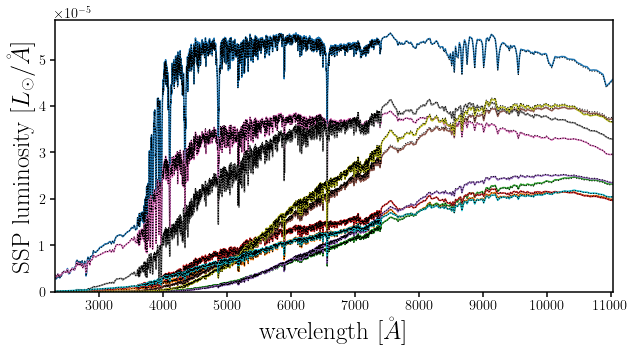

In [7]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(10): 
    sub.plot(Mdesi._emu_waves, np.exp(log_emu[i]), c='C%i' % i)
    sub.plot(Mdesi._emu_waves, np.exp(test_logspec[i]), c='k', ls=':', lw=1)
sub.set_xlabel('wavelength [$\AA$]', fontsize=25)
sub.set_xlim(Mdesi._emu_waves.min(), Mdesi._emu_waves.max())
sub.set_ylabel('SSP luminosity [$L_\odot/\AA$]', fontsize=25)
sub.set_ylim(0., None)

(-0.1, 0.1)

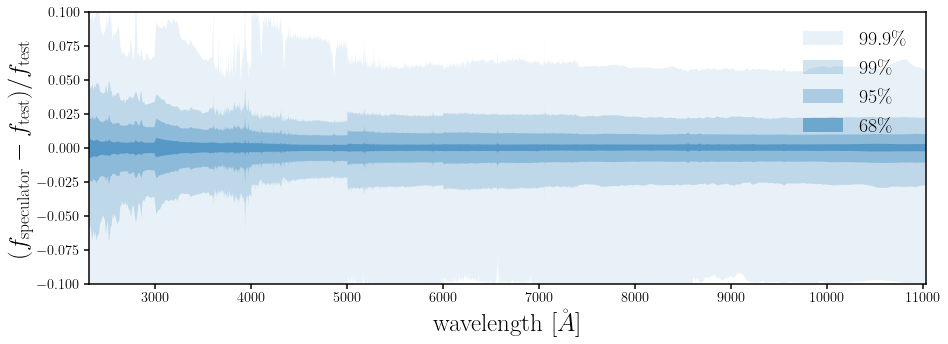

In [8]:
frac_dspectrum = 1. - np.exp(log_emu - test_logspec)
frac_dspectrum_quantiles = np.nanquantile(frac_dspectrum, 
        [0.0005, 0.005, 0.025, 0.16, 0.84, 0.975, 0.995, 0.9995], axis=0)

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.fill_between(Mdesi._emu_waves, 
        frac_dspectrum_quantiles[0],
        frac_dspectrum_quantiles[-1], fc='C0', ec='none', alpha=0.1, label=r'$99.9\%$')
sub.fill_between(Mdesi._emu_waves, 
        frac_dspectrum_quantiles[1],
        frac_dspectrum_quantiles[-2], fc='C0', ec='none', alpha=0.2, label=r'$99\%$')
sub.fill_between(Mdesi._emu_waves, 
        frac_dspectrum_quantiles[2],
        frac_dspectrum_quantiles[-3], fc='C0', ec='none', alpha=0.3, label=r'$95\%$')
sub.fill_between(Mdesi._emu_waves, 
        frac_dspectrum_quantiles[3],
        frac_dspectrum_quantiles[-4], fc='C0', ec='none', alpha=0.5, label=r'$68\%$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('wavelength [$\AA$]', fontsize=25)
sub.set_xlim(Mdesi._emu_waves.min(), Mdesi._emu_waves.max())
sub.set_ylabel(r'$(f_{\rm speculator} - f_{\rm test})/f_{\rm test}$', fontsize=25)
sub.set_ylim(-0.1, 0.1)

In [14]:
fsps = Models.FSPS(name='nmfburst')

(0.0, 5.8584841859625814e-05)

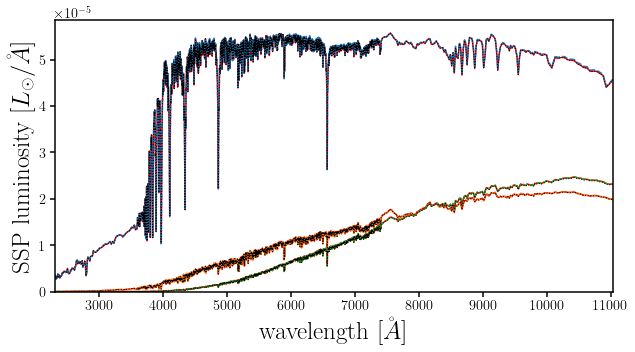

In [15]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(3): 
    _w, _ssp_lum = fsps._sps_model(test_theta[i])
    sub.plot(_w, _ssp_lum, c='r')
    sub.plot(Mdesi._emu_waves, np.exp(log_emu[i]), c='C%i' % i, ls='--')
    sub.plot(Mdesi._emu_waves, np.exp(test_logspec[i]), c='k', ls=':', lw=1)
sub.set_xlabel('wavelength [$\AA$]', fontsize=25)
sub.set_xlim(Mdesi._emu_waves.min(), Mdesi._emu_waves.max())
sub.set_ylabel('SSP luminosity [$L_\odot/\AA$]', fontsize=25)
sub.set_ylim(0., None)

# `DESIemulator.sed` test

In [9]:
some_theta = np.concatenate([[10.], test_theta[2][:-1]])

/Users/chahah/projects/provabgs/src/provabgs/models.py:1033: RuntimeWarning: overflow encountered in exp
  layers.append((self._emu_beta[iwave][i] + (1.-self._emu_beta[iwave][i]) * 1./(1.+np.exp(-self._emu_alpha[iwave][i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:1033: RuntimeWarning: overflow encountered in exp
  layers.append((self._emu_beta[iwave][i] + (1.-self._emu_beta[iwave][i]) * 1./(1.+np.exp(-self._emu_alpha[iwave][i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:1033: RuntimeWarning: overflow encountered in exp
  layers.append((self._emu_beta[iwave][i] + (1.-self._emu_beta[iwave][i]) * 1./(1.+np.exp(-self._emu_alpha[iwave][i]*act[-1])))*act[-1])


(0.0, 3.333326831118225)

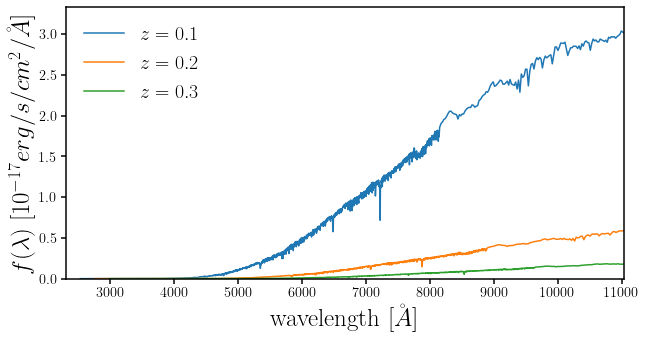

In [11]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for z in [0.1, 0.2, 0.3]: 
    w, flux = Mdesi.sed(some_theta, z)
    sub.plot(w, flux, label='$z=%.1f$' % z)
sub.legend(loc='upper left', fontsize=20)
sub.set_xlabel('wavelength [$\AA$]', fontsize=25)
sub.set_xlim(Mdesi._emu_waves.min(), Mdesi._emu_waves.max())
sub.set_ylabel(r'$f(\lambda)$ [$10^{-17}erg/s/cm^2/\AA$]', fontsize=25)
sub.set_ylim(0., None)